
regression  التوقع 

Model Training

Fitting the Model

Simple Linear Regression

عندي بيانات  واريد  اتوقع  ناتج البيانات الجديدة** **
 مثلا عندك بيانات مجموعة بيوت حدرب الالة عليها من حتنيطي بيانات  بيانات بيت جديدة هو حيتوقع السعر 

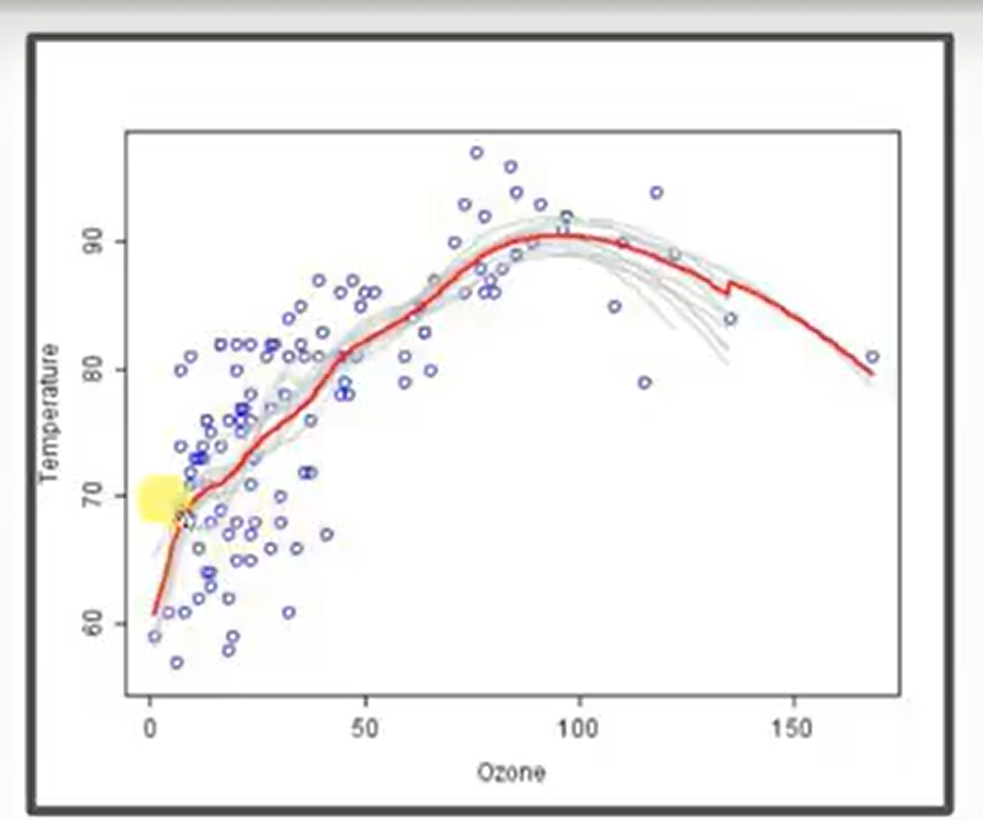

تطبيقات في الواقع 

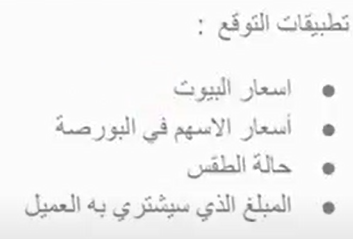

يعني عندي بيانات مربوطة ببعضها البعض واريد اعرف  قيمة بيانات جديدة 


simple linear regression


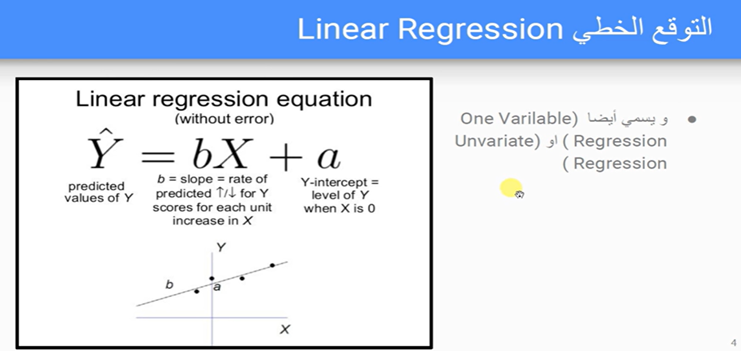

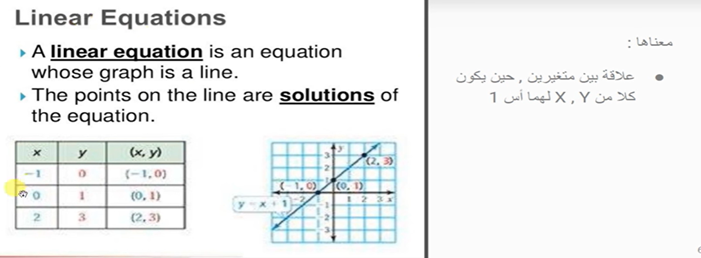

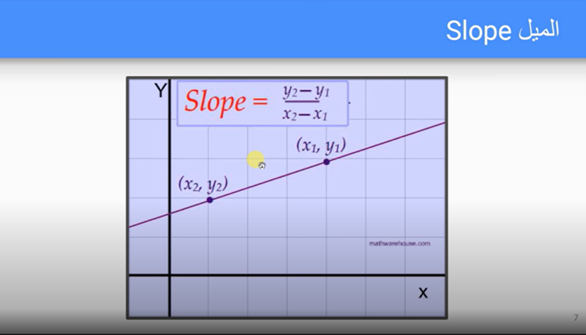


افضل  خط موجود في الوسط 



In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [183]:
df = pd.read_csv("\project\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [184]:
x = df.iloc[:, :-1]
y = df.iloc[:, 1]
x


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [185]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [186]:
# يتم استخدام X_train و y_train كبيانات التدريب
# ويتم استخدام X_test و y_test كبيانات الاختبار
# استخدم وظيفة train_test_split() لفصل البيانات
x = df[['YearsExperience']]
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# إعادة تعيين الفهرس لـ X_train و X_test
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

table = pd.concat([x_train, x_test, y_train,y_test], axis=1)
table.columns = ['YearsExperience_train', 'YearsExperience_test', 'Salary_train', 'Salary_test']
print(table)

    YearsExperience_train  YearsExperience_test  Salary_train  Salary_test
0                     2.9                   1.5       39343.0          NaN
1                     5.1                  10.3       46205.0          NaN
2                     3.2                   4.1           NaN      37731.0
3                     4.5                   3.9       43525.0          NaN
4                     8.2                   9.5       39891.0          NaN
5                     6.8                   8.7       56642.0          NaN
6                     1.3                   9.6       60150.0          NaN
7                    10.5                   4.0       54445.0          NaN
8                     3.0                   5.3       64445.0          NaN
9                     2.2                   7.9       57189.0          NaN
10                    5.9                   NaN           NaN      63218.0
11                    6.0                   NaN           NaN      55794.0
12                    3.7

In [187]:
from sklearn.linear_model import LinearRegression

# إنشاء مثيل لنموذج الانحدار الخطي
reg = LinearRegression()

# تدريب النموذج باستخدام البيانات التدريبية
reg.fit(x_train, y_train)


LinearRegression()

In [188]:
#التنبؤ
# التنبؤ بقيم المتغير المعتمد باستخدام البيانات التحقق
y_pred=reg.predict(x_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)
#Actual الموضف شكد ماخذ بالحقيقة 
#Predicted      هو شكد ياخذ هذا التنبؤ



      Actual      Predicted
2    37731.0   40835.105909
28  122391.0  123079.399408
13   57081.0   65134.556261
10   63218.0   63265.367772
26  116969.0  115602.645454
24  109431.0  108125.891499
27  112635.0  116537.239698
11   55794.0   64199.962017
17   83088.0   76349.687193
22  101302.0  100649.137545


حت توضح الدنية نرسم 

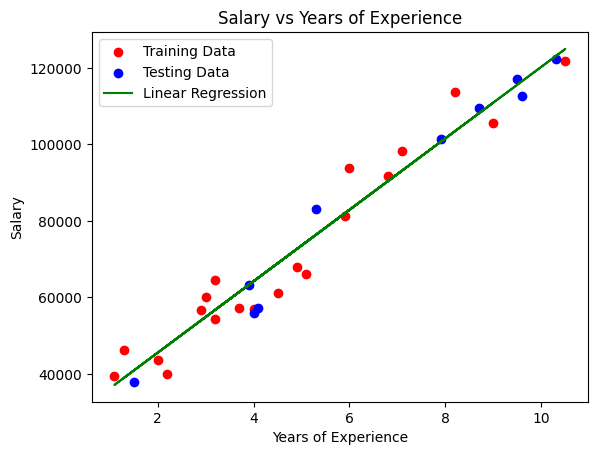

In [193]:
# رسم النقاط التدريبية
plt.scatter(x_train, y_train, color='red', label='Training Data')

# رسم النقاط التحققية
plt.scatter(x_test, y_test, color='blue', label='Testing Data')

# رسم الخط الذي يمثل النموذج المدرب
plt.plot(x_train, reg.predict(x_train), color='green', label='Linear Regression')

# إعداد عناصر الرسم البياني
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

# عرض الرسم البياني
plt.show()
